In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class My_Custom_Generator(tf.keras.utils.Sequence) :
  
  def __init__(self, X, labels, batch_size) :
    self.X = X
    self.labels = labels
    self.batch_size = batch_size
    self.shuffle = True
    self.on_epoch_end()

  def __iter__(self):
    """Create a generator that iterate over the Sequence."""
    for item in (self[i] for i in range(len(self))):
      yield item  
    
  def __len__(self) :
    #self.on_epoch_end()
    result = (np.ceil(len(self.X) / float(self.batch_size))).astype(np.int)
    return result

  def on_epoch_end(self):
    self.indexes = np.arange(len(self.labels))
    if self.shuffle == True:
      np.random.shuffle(self.indexes)
  
  def __getitem__(self, idx) :
    indexes = self.indexes[idx*self.batch_size:(idx+1)*self.batch_size]
    batch_x = [self.X[k] for k in indexes]
    batch_y = [self.labels[k] for k in indexes]    
    return np.array(batch_x, dtype=np.int32), np.array(batch_y)


In [3]:
num_patterns = 2000
num_features = 2
mu, sigma = 0, 0.5
num_classes = 2
num_hidden_neurons = 4
Xred = np.random.normal(mu, sigma, (num_patterns, num_features)) + np.array([1,1])
Yred = np.zeros(num_patterns, dtype=int)
Xblue = np.random.normal(mu, sigma, (num_patterns, num_features)) + np.array([-1,-1])
Yblue = np.ones(num_patterns, dtype=int)
X = np.concatenate((Xred, Xblue), axis=0)
Y = np.concatenate((Yred, Yblue), axis=0)
Y_1_hot = np.eye(Y.max()+1)[Y]

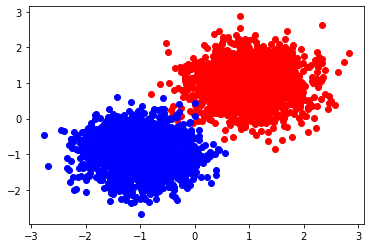

In [4]:
plt.scatter(Xred[:,0], Xred[:,1], color='red')
plt.scatter(Xblue[:,0], Xblue[:,1], color='blue')

In [5]:
#Multiplayer Perceptron

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(num_hidden_neurons, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [6]:
#Train Model
X_train, X_test, y_train, y_test = train_test_split(X, Y_1_hot, test_size=0.1, random_state=34)
batch_size = 100
num_epochs = 50
my_training_batch_generator = My_Custom_Generator(X_train, y_train, batch_size)
my_validation_batch_generator = My_Custom_Generator(X_test, y_test, batch_size)

model.compile(
  'adam',
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy']
)

model.fit(
  my_training_batch_generator,
  epochs=num_epochs,
  validation_data = my_validation_batch_generator,
  validation_steps=len(my_validation_batch_generator)  
)


Epoch 1/50
36/36 [==============================] - 1s 32ms/step - loss: 0.8218 - accuracy: 0.1894 - val_loss: 0.7924 - val_accuracy: 0.2525
Epoch 2/50
36/36 [==============================] - 0s 6ms/step - loss: 0.7535 - accuracy: 0.2453 - val_loss: 0.7268 - val_accuracy: 0.2525
Epoch 3/50
36/36 [==============================] - 0s 6ms/step - loss: 0.6951 - accuracy: 0.4233 - val_loss: 0.6717 - val_accuracy: 0.6275
Epoch 4/50
36/36 [==============================] - 0s 5ms/step - loss: 0.6445 - accuracy: 0.6175 - val_loss: 0.6217 - val_accuracy: 0.6425
Epoch 5/50
36/36 [==============================] - 0s 5ms/step - loss: 0.5977 - accuracy: 0.8364 - val_loss: 0.5764 - val_accuracy: 0.8850
Epoch 6/50
36/36 [==============================] - 0s 5ms/step - loss: 0.5549 - accuracy: 0.8769 - val_loss: 0.5351 - val_accuracy: 0.8850
Epoch 7/50
36/36 [==============================] - 0s 4ms/step - loss: 0.5161 - accuracy: 0.8769 - val_loss: 0.4984 - val_accuracy: 0.8850
Epoch 8/50
36/36 [=